# Customer Attrition Forecasting in Banking


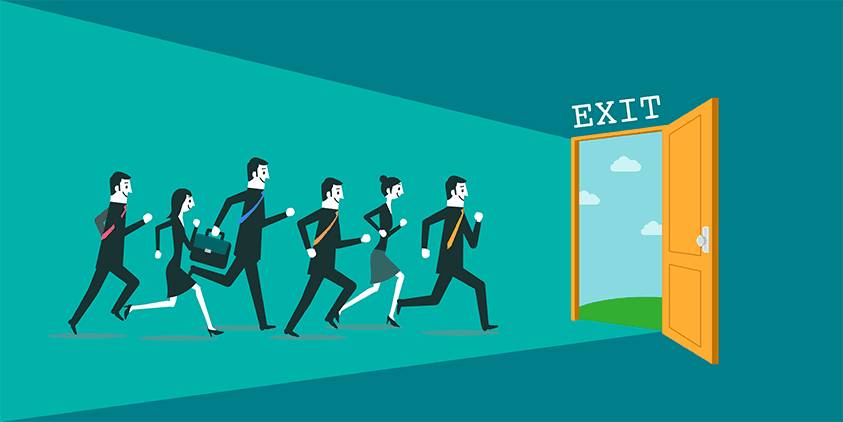

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"F:\NIT\dataset\Churn_Modelling (1).csv")


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# separating categorical and numerical column

In [7]:
cat_var=[]
num_var=[]

for column in df.columns:
    if df[column].dtype=='O':
        cat_var.append(column)
    else:
        num_var.append(column)

In [8]:
cat_var

['Surname', 'Geography', 'Gender']

In [9]:
num_var

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

# describe 

In [10]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df[cat_var].describe()

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [13]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# drop irrelevent column

In [14]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# encoding categorial variable

In [17]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
df=pd.get_dummies(df,drop_first=True,dtype=int)

# check the dependent variable

In [19]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [20]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

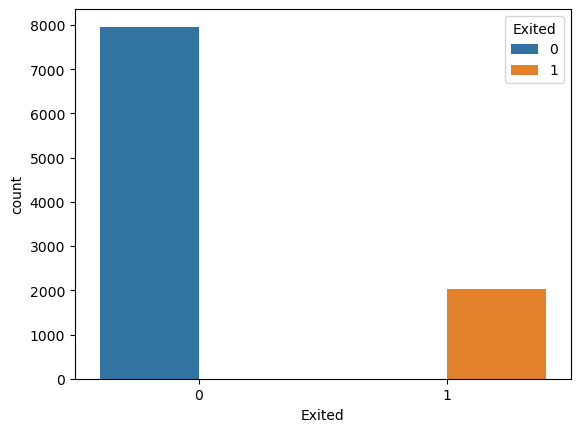

In [21]:
sns.countplot(df,x=df['Exited'],hue='Exited')

# separate dependent and independent variable

In [22]:
x=df.drop('Exited',axis=1)

In [23]:
y=df['Exited']

In [24]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [25]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

# feature sccaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [28]:
x_train

array([[-1.24021723,  0.77986083,  0.35390313, ..., -0.57812007,
        -0.57504086, -1.09665089],
       [ 0.75974873, -0.27382717,  0.35390313, ...,  1.72974448,
        -0.57504086,  0.91186722],
       [-1.72725557, -0.9443559 , -0.3390904 , ..., -0.57812007,
        -0.57504086, -1.09665089],
       ...,
       [-0.51484098,  0.87565065,  1.39339343, ...,  1.72974448,
        -0.57504086,  0.91186722],
       [ 0.73902369, -0.36961699, -1.03208393, ..., -0.57812007,
        -0.57504086, -1.09665089],
       [ 0.95663657, -1.32751517,  0.35390313, ..., -0.57812007,
         1.73900686,  0.91186722]])

In [29]:
x_test

array([[-1.975956  ,  0.1093321 ,  0.35390313, ...,  1.72974448,
        -0.57504086, -1.09665089],
       [ 0.64576103, -1.42330499,  0.7003999 , ...,  1.72974448,
        -0.57504086, -1.09665089],
       [ 0.12763513,  2.40828774,  0.35390313, ..., -0.57812007,
         1.73900686,  0.91186722],
       ...,
       [-1.20912968,  0.20512192,  1.39339343, ..., -0.57812007,
        -0.57504086,  0.91186722],
       [ 1.10171182,  1.54617938,  1.39339343, ..., -0.57812007,
         1.73900686, -1.09665089],
       [ 0.9773616 , -0.75277626, -0.68558716, ..., -0.57812007,
         1.73900686, -1.09665089]])

# model 

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

# check the metrics

In [32]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score

In [33]:
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.83      0.96      0.89      1593\n           1       0.58      0.22      0.32       407\n\n    accuracy                           0.81      2000\n   macro avg       0.71      0.59      0.60      2000\nweighted avg       0.78      0.81      0.77      2000\n'

In [34]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.809

In [35]:
precision=precision_score(y_test,y_pred)
precision

0.5827814569536424

In [36]:
recall=recall_score(y_test,y_pred)
recall

0.21621621621621623

In [37]:
f1=f1_score(y_test,y_pred)
f1

0.31541218637992835

# Handle imbalanced dataset with Smote

### oversample-->replace the minority class with replacement 
### undersampling-->randomly delete class from majority class
### smote->>synthetic minority oversampling technique

In [38]:
from imblearn.over_sampling import SMOTE
x_res,y_res=SMOTE().fit_resample(x,y)

In [39]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=0)

In [41]:
x_train.shape,x_test.shape

((12740, 11), (3186, 11))

In [42]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [43]:
x_train

array([[-0.37382539,  0.40948894, -0.65714154, ..., -0.57590009,
        -0.46213038, -0.83803236],
       [ 0.02903283, -1.50322947,  0.07647073, ...,  1.73641229,
        -0.46213038,  1.19327134],
       [-0.01451941,  2.22153797, -1.39075381, ..., -0.57590009,
        -0.46213038, -0.83803236],
       ...,
       [-0.63513884, -0.29519679,  1.54369527, ..., -0.57590009,
         2.1638915 , -0.83803236],
       [-0.4282657 , -0.29519679, -1.02394767, ..., -0.57590009,
        -0.46213038,  1.19327134],
       [-0.27583285,  0.71149711, -1.39075381, ...,  1.73641229,
        -0.46213038, -0.83803236]])

In [44]:
x_test

array([[ 0.69320451,  1.81886041,  0.07647073, ..., -0.57590009,
        -0.46213038, -0.83803236],
       [-0.26494479, -0.79854374, -1.02394767, ..., -0.57590009,
        -0.46213038,  1.19327134],
       [ 0.15968956,  0.81216651,  0.810083  , ...,  1.73641229,
        -0.46213038,  1.19327134],
       ...,
       [-1.63684038, -1.10055191, -1.39075381, ..., -0.57590009,
        -0.46213038, -0.83803236],
       [-0.52625824, -1.80523764, -0.2903354 , ..., -0.57590009,
        -0.46213038,  1.19327134],
       [ 0.69320451, -1.30189069, -0.2903354 , ...,  1.73641229,
        -0.46213038,  1.19327134]])

# logistic regression

In [45]:
log=LogisticRegression()
log.fit(x_train,y_train)
log_ypred=log.predict(x_test)

In [49]:
lr_accuracy=accuracy_score(y_test,log_ypred)
lr_accuracy

0.7893910860012555

In [47]:
lr_precision=precision_score(y_test,log_ypred)
lr_precision

0.7794561933534743

In [50]:
lr_recall=recall_score(y_test,log_ypred)
lr_recall

0.8082706766917294

# SVC

In [51]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)


svc_accuracy=accuracy_score(y_test,log_ypred)
svc_accuracy

0.7893910860012555

In [73]:
svc_ypred=svc.predict(x_test)
svc_ypred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [53]:
svc_precision=precision_score(y_test,log_ypred)
svc_precision


0.7794561933534743

In [54]:
svc_recall=recall_score(y_test,log_ypred)
svc_recall

0.8082706766917294

# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [74]:
knn_ypred=knn.predict(x_test)
knn_ypred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [58]:
knn_accuracy=accuracy_score(y_test,log_ypred)
knn_accuracy


0.7893910860012555

In [59]:
knn_precision=precision_score(y_test,log_ypred)
knn_precision

0.7794561933534743

In [60]:
knn_recall=recall_score(y_test,log_ypred)
knn_recall

0.8082706766917294

# decision tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [75]:
dt_ypred=dt.predict(x_test)
dt_ypred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [62]:
dt_accuracy=accuracy_score(y_test,log_ypred)
dt_accuracy


0.7893910860012555

In [63]:
dt_precision=precision_score(y_test,log_ypred)
dt_precision

0.7794561933534743

In [64]:
dt_recall=recall_score(y_test,log_ypred)
dt_recall

0.8082706766917294

# Random forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [76]:
rf_ypred=rf.predict(x_test)
rf_ypred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [66]:
rf_accuracy=accuracy_score(y_test,log_ypred)
rf_accuracy


0.7893910860012555

In [67]:
rf_precision=precision_score(y_test,log_ypred)
rf_precision

0.7794561933534743

In [68]:
rf_recall=recall_score(y_test,log_ypred)
rf_recall

0.8082706766917294

# Gradient boost classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gcb=GradientBoostingClassifier()
gcb.fit(x_train,y_train)


GradientBoostingClassifier()

In [77]:
gcb_ypred=gcb.predict(x_test)
gcb_ypred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [70]:
gcb_accuracy=accuracy_score(y_test,log_ypred)
gcb_accuracy


0.7893910860012555

In [71]:
gcb_precision=precision_score(y_test,log_ypred)
gcb_precision

0.7794561933534743

In [72]:
gcb_recall=recall_score(y_test,log_ypred)
gcb_recall

0.8082706766917294

# create a dataframe and compare all accuracy 

In [78]:
new_df1=pd.DataFrame({
    'model':['lr','svc','knn','dt','rf','gcb'],
    'accuracy':[accuracy_score(y_test,log_ypred),
               accuracy_score(y_test,svc_ypred),
                accuracy_score(y_test,knn_ypred),
                accuracy_score(y_test,dt_ypred),
                accuracy_score(y_test,rf_ypred),
                accuracy_score(y_test,gcb_ypred)
               
               ]
})

In [79]:
new_df1

,model,accuracy
0,lr,0.789391
1,svc,0.841180
2,knn,0.820465
3,dt,0.795041
4,rf,0.861582
5,gcb,0.839611


 so here we see that rf is the best model that can better analysis our dataset 

# visualize

<Axes: xlabel='model', ylabel='accuracy'>

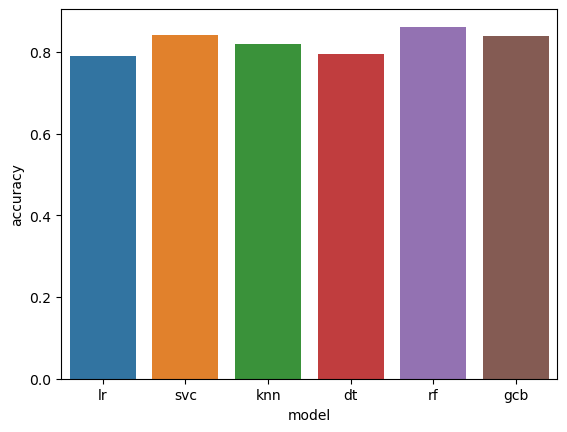

In [81]:
import seaborn as sns
sns.barplot(x='model', y='accuracy', data=new_df1)


In [90]:
new_df2=pd.DataFrame({
    'model':['lr','svc','knn','dt','rf','gcb'],
    'accuracy':[accuracy_score(y_test,log_ypred),
               accuracy_score(y_test,svc_ypred),
                accuracy_score(y_test,knn_ypred),
                accuracy_score(y_test,dt_ypred),
                accuracy_score(y_test,rf_ypred),
                accuracy_score(y_test,gcb_ypred)
               ],
    'precision':[precision_score(y_test,log_ypred),
                 precision_score(y_test,svc_ypred),
                 precision_score(y_test,knn_ypred),
                 precision_score(y_test,dt_ypred),
                 precision_score(y_test,rf_ypred),
                 precision_score(y_test,gcb_ypred)],
    'recall':[recall_score(y_test,log_ypred),
             recall_score(y_test,svc_ypred),
             recall_score(y_test,knn_ypred),
             recall_score(y_test,dt_ypred),
             recall_score(y_test,rf_ypred),
             recall_score(y_test,gcb_ypred)]
})

In [91]:
new_df2

,model,accuracy,precision,recall
0,lr,0.789391,0.779456,0.808271
1,svc,0.841180,0.836005,0.849624
2,knn,0.820465,0.806220,0.844612
3,dt,0.795041,0.785584,0.812657
4,rf,0.861582,0.858029,0.867168
5,gcb,0.839611,0.841840,0.837093


# visualize all metrics

<Axes: xlabel='model', ylabel='accuracy'>

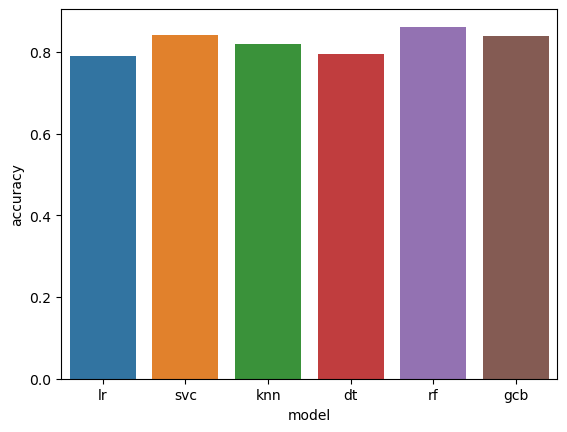

In [87]:
import seaborn as sns
sns.barplot(x='model', y='accuracy', data=new_df1)


<Axes: xlabel='model', ylabel='precision'>

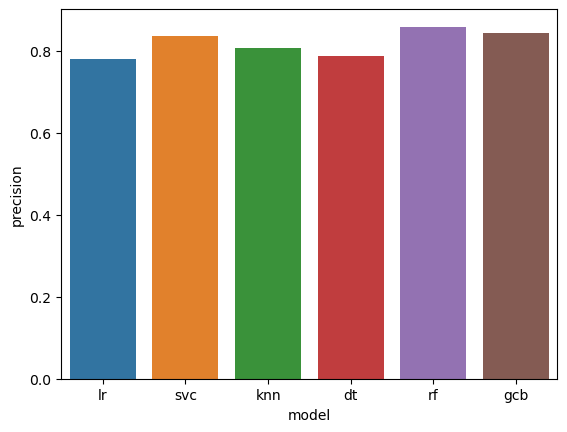

In [93]:
import seaborn as sns
sns.barplot(x='model', y='precision', data=new_df2)


<Axes: xlabel='model', ylabel='recall'>

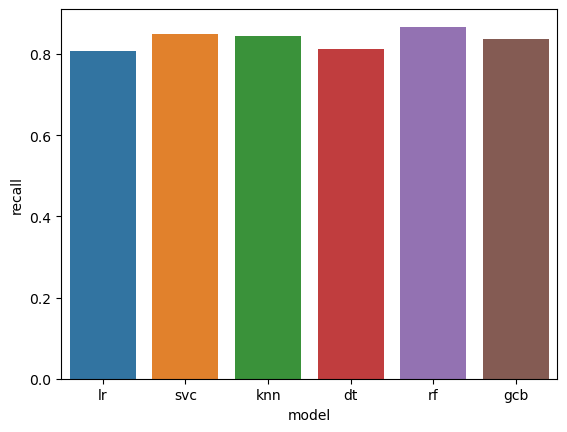

In [94]:
import seaborn as sns
sns.barplot(x='model', y='recall', data=new_df2)
